In [191]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Load Dataset

In [192]:
data = pd.read_csv('netflix.csv')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [193]:
data.shape

(8807, 12)

In [194]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [195]:
len(data.title.unique())

8807

In [196]:
data.release_year.unique()

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943], dtype=int64)

In [197]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


#### There are total 12 columns with 8807 rows, in which 11 columns are objects and one is integer column. 
#### Also it seems there are some null values

In [198]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,8807.0,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0


In [199]:
data.describe(include = object)

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [200]:
data.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

#### It seems like show id has all unique id and also all titles are unique

In [201]:
data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

#### There are 2634 rows null is director column. Also 825 rows in cast & 831 rows in country are null

In [202]:
data[data.isnull().any(axis=1)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,NaN,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada","May 1, 2018",2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...
8796,s8797,TV Show,Yunus Emre,NaN,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,"January 17, 2017",2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves..."
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."


In [203]:
null_data_percentage = (3475/8807) *100
np.round(null_data_percentage, 2)

39.46

#### There is almost 40 % of data has null values

In [204]:
### Changed data type of date_added from object to datetime

data['date_added'] = pd.to_datetime(data.date_added)

In [205]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [206]:
data[data.type == 'TV Show']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,NaN,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada",2018-05-01,2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...
8796,s8797,TV Show,Yunus Emre,NaN,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves..."
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia",2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."


In [207]:
len(data[data.type == 'TV Show'])

2676

#### Out of 8807, there are 2676 TV shows.

In [208]:
data[data.type == 'Movie']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


#### There are more movies listed here than TV Shows

### Un-nesting the columns

In [209]:
def unnest_column(df, col):
    # Splitting the comma-separated values and creating a new row for each value
    df = (df.set_index(df.columns.drop(col,1).tolist())
            .apply(lambda x: x.str.split(',').explode())
            .reset_index())
    return df

In [210]:
df = unnest_column(data, 'country')
df.shape

(10850, 12)

In [211]:
# Removing unwanted space and duplicated values

df['country'] = df['country'].str.strip()

df.loc[df['country'] == '']

,show_id,type,title,director,cast,date_added,release_year,rating,duration,listed_in,description,country
241,s194,TV Show,D.P.,NaN,"Jung Hae-in, Koo Kyo-hwan, Kim Sung-kyun, Son ...",2021-08-27,2021,TV-MA,1 Season,"International TV Shows, TV Dramas",A young private’s assignment to capture army d...,
447,s366,Movie,Eyes of a Thief,Najwa Najjar,"Khaled Abol El Naga, Souad Massi, Suhail Hadda...",2021-07-30,2014,TV-14,103 min,"Dramas, Independent Movies, International Movies","After a decade in prison, a Palestinian man wi...",
1458,s1193,Movie,The Present,Farah Nabulsi,"Saleh Bakri, Maryam Kanj, Maryam Kamiel Basha,...",2021-03-18,2020,TV-MA,24 min,"Dramas, International Movies",Yusuf and his daughter set out to buy his wife...,
2714,s2225,Movie,Funan,Denis Do,"Bérénice Bejo, Louis Garrel, Colette Kieffer, ...",2020-07-18,2018,TV-14,87 min,"Dramas, International Movies",Separated from their young son during the brut...,
5556,s4654,Movie,City of Joy,Madeleine Gavin,NaN,2018-09-07,2018,TV-MA,77 min,Documentaries,Women who've been sexually brutalized in war-t...,
7068,s5926,Movie,Virunga,Orlando von Einsiedel,NaN,2014-11-07,2014,TV-MA,100 min,"Documentaries, International Movies",The Oscar-nominated true story of the rangers ...,
8470,s7008,Movie,Hotel Pacific,Janusz Majewski,"Marek Kondrat, Roman Wilhelmi, Roman Skamene, ...",2019-10-01,1975,TV-MA,96 min,"Classic Movies, Dramas, International Movies",A motivated teen strives to rise from dishwash...,


In [212]:
df.country.nunique()

123

In [213]:
df.head()

,show_id,type,title,director,cast,date_added,release_year,rating,duration,listed_in,description,country
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",United States
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",South Africa
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,India


In [214]:
data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

### Handling Null Values

In [215]:
df['director'] = df.director.fillna('Unknown director')
df['cast']    = df.cast.fillna('Unknown cast')
df['country'] = df.country.fillna('Unknown country')
df['date_added'] =df.date_added.fillna('Not applicable')
df['rating'] =df.rating.fillna('Not available')
df['duration'] =df.duration.fillna('Not available')

In [216]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
country         0
dtype: int64

##### Replaced null value as unknown in object type of columns 

### Non - graphical Analysis

In [217]:
# making different data frame for movie and tv shows

movies = df[df.type == 'Movie']
tv_show = df[df.type == 'TV Show']

In [218]:
movies.head()

,show_id,type,title,director,cast,date_added,release_year,rating,duration,listed_in,description,country
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown cast,2021-09-25 00:00:00,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",United States
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",2021-09-24 00:00:00,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,Unknown country
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",2021-09-24 00:00:00,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",United States
8,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",2021-09-24 00:00:00,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",Ghana
9,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",2021-09-24 00:00:00,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",Burkina Faso


In [219]:
movies.shape

(7819, 12)

In [220]:
tv_show.shape

(3031, 12)

In [221]:
movies.duration.value_counts()

93 min     202
90 min     199
96 min     188
94 min     187
97 min     183
          ... 
203 min      1
253 min      1
230 min      1
237 min      1
191 min      1
Name: duration, Length: 206, dtype: int64

In [222]:
movies['date_added'] = pd.to_datetime(movies['date_added'])
movies['date_added_netflix'] = movies['date_added'].dt.year
movies['release_year'] = pd.to_datetime(movies['release_year'], format = '%Y')


In [223]:
wrong_data = movies[movies.date_added < movies.release_year]
wrong_data

,show_id,type,title,director,cast,date_added,release_year,rating,duration,listed_in,description,country,date_added_netflix
6454,s5395,Movie,Hans Teeuwen: Real Rancour,Doesjka van Hoogdalem,Hans Teeuwen,2017-07-01,2018-01-01,TV-MA,86 min,Stand-Up Comedy,Comedian Hans Teeuwen rebels against political...,Netherlands,2017
8551,s7064,Movie,Incoming,Eric Zaragosa,"Scott Adkins, Aaron McCusker, Vahldin Prelic, ...",2018-10-26,2019-01-01,TV-MA,89 min,"Action & Adventure, Sci-Fi & Fantasy",When an imprisoned terrorist cell hijacks a hi...,Serbia,2018
8552,s7064,Movie,Incoming,Eric Zaragosa,"Scott Adkins, Aaron McCusker, Vahldin Prelic, ...",2018-10-26,2019-01-01,TV-MA,89 min,"Action & Adventure, Sci-Fi & Fantasy",When an imprisoned terrorist cell hijacks a hi...,United States,2018


#### These are the movies which got added on netflix before release. This can't be possible

In [224]:
index_to_remove = [6454, 8551, 8552]
movie_filtered = movies.drop(index_to_remove)

In [225]:
movie_filtered

,show_id,type,title,director,cast,date_added,release_year,rating,duration,listed_in,description,country,date_added_netflix
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown cast,2021-09-25,2020-01-01,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",United States,2021
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",2021-09-24,2021-01-01,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,Unknown country,2021
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",2021-09-24,1993-01-01,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",United States,2021
8,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",2021-09-24,1993-01-01,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",Ghana,2021
9,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",2021-09-24,1993-01-01,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",Burkina Faso,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10844,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...",2016-03-09,2015-01-01,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,Jordan,2016
10845,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",2019-11-20,2007-01-01,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",United States,2019
10847,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",2019-11-01,2009-01-01,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,United States,2019
10848,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",2020-01-11,2006-01-01,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",United States,2020


In [226]:
movies.duplicated().sum()

0

In [227]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7819 entries, 0 to 10849
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   show_id             7819 non-null   object        
 1   type                7819 non-null   object        
 2   title               7819 non-null   object        
 3   director            7819 non-null   object        
 4   cast                7819 non-null   object        
 5   date_added          7819 non-null   datetime64[ns]
 6   release_year        7819 non-null   datetime64[ns]
 7   rating              7819 non-null   object        
 8   duration            7819 non-null   object        
 9   listed_in           7819 non-null   object        
 10  description         7819 non-null   object        
 11  country             7819 non-null   object        
 12  date_added_netflix  7819 non-null   int64         
dtypes: datetime64[ns](2), int64(1), object(10)
memo

In [228]:
tv_show.duration.value_counts()

1 Season      1985
2 Seasons      497
3 Seasons      242
4 Seasons      119
5 Seasons       75
6 Seasons       35
7 Seasons       28
8 Seasons       18
10 Seasons      11
9 Seasons        9
13 Seasons       3
15 Seasons       3
12 Seasons       3
11 Seasons       2
17 Seasons       1
Name: duration, dtype: int64

In [229]:
tv_show.head()

,show_id,type,title,director,cast,date_added,release_year,rating,duration,listed_in,description,country
1,s2,TV Show,Blood & Water,Unknown director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",2021-09-24 00:00:00,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",South Africa
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",2021-09-24 00:00:00,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Unknown country
3,s4,TV Show,Jailbirds New Orleans,Unknown director,Unknown cast,2021-09-24 00:00:00,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Unknown country
4,s5,TV Show,Kota Factory,Unknown director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",2021-09-24 00:00:00,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,India
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",2021-09-24 00:00:00,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,Unknown country


In [230]:
movies.director.value_counts()

Unknown director          211
Rajiv Chilaka              19
Martin Scorsese            18
Raúl Campos, Jan Suter     18
Steven Spielberg           18
                         ... 
Sanjib Dey                  1
Daniel Yee Heng Chan        1
Han Han                     1
Jang Jae-hyun               1
Mozez Singh                 1
Name: director, Length: 4355, dtype: int64

In [231]:
tv_show.director.value_counts()

Unknown director                                                                                                2759
Alastair Fothergill                                                                                                8
Moyoung Jin, Caroline Sá, Deepti Kakkar, Fahad Mustafa, Hikaru Toda, Chico Pereira, Elaine McMillion Sheldon       5
Damien Chazelle, Houda Benyamina, Laïla Marrakchi, Alan Poul                                                       4
Cecilia Peck                                                                                                       4
                                                                                                                ... 
Juliana Vicente                                                                                                    1
Chang Chin-jung, Chen Rong-hui                                                                                     1
Thierry Demaizière, Alban Teurlai                               

#### There are more unknown director in tv shows than movies

In [232]:
movies.country.value_counts()

United States      2752
India               962
United Kingdom      534
Unknown country     440
Canada              319
                   ... 
Bermuda               1
Ecuador               1
Armenia               1
Mongolia              1
Montenegro            1
Name: country, Length: 119, dtype: int64

In [233]:
tv_show.country.value_counts()

United States           938
Unknown country         391
United Kingdom          272
Japan                   199
South Korea             170
                       ... 
Malta                     1
United Arab Emirates      1
Belarus                   1
Uruguay                   1
Switzerland               1
Name: country, Length: 67, dtype: int64

#### Most of the movies and tv shows are from united states
#### Indian movies are more than tv shows

In [234]:
movies.country.nunique()

119

In [235]:
country = data[['show_id', 'type', 'country']]
country.dropna(inplace = True)
country

,show_id,type,country
0,s1,Movie,United States
1,s2,TV Show,South Africa
4,s5,TV Show,India
7,s8,Movie,"United States, Ghana, Burkina Faso, United Kin..."
8,s9,TV Show,United Kingdom
...,...,...,...
8801,s8802,Movie,"United Arab Emirates, Jordan"
8802,s8803,Movie,United States
8804,s8805,Movie,United States
8805,s8806,Movie,United States


In [236]:
country = unnest_column(country, 'country')
country['country'] = country.country.str.strip()      # Removing white space
country

,show_id,type,country
0,s1,Movie,United States
1,s2,TV Show,South Africa
2,s5,TV Show,India
3,s8,Movie,United States
4,s8,Movie,Ghana
...,...,...,...
10014,s8802,Movie,Jordan
10015,s8803,Movie,United States
10016,s8805,Movie,United States
10017,s8806,Movie,United States


In [237]:


y = country.groupby(['country', 'type'])['show_id'].count().reset_index()
total_cnt = y.pivot(index = 'country', columns = 'type', values = 'show_id').sort_values('Movie', ascending = False)
total_cnt

type,Movie,TV Show
country,,
United States,2752.0,938.0
India,962.0,84.0
United Kingdom,534.0,272.0
Canada,319.0,126.0
France,303.0,90.0
...,...,...
Azerbaijan,NaN,1.0
Belarus,NaN,1.0
Cuba,NaN,1.0


In [238]:
top_10_country = total_cnt.head(10)
top_10_country

type,Movie,TV Show
country,,
United States,2752.0,938.0
India,962.0,84.0
United Kingdom,534.0,272.0
Canada,319.0,126.0
France,303.0,90.0
Germany,182.0,44.0
Spain,171.0,61.0
Japan,119.0,199.0
China,114.0,48.0


#### First 10 country where more tv shows and movies are coming from. US, India, UK are on top 3

In [239]:
director = data[['show_id', 'type', 'director']]
data.dropna()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [240]:
director.director.nunique()

4528

#### There are total 4529 unique directors

In [241]:
a = director.groupby(['director', 'type'])['show_id'].count().reset_index()
top_director = a.pivot(index = 'director', columns = 'type', values = 'show_id').sort_values('Movie', ascending = False)
top_director

type,Movie,TV Show
director,,
Rajiv Chilaka,19.0,NaN
"Raúl Campos, Jan Suter",18.0,NaN
Suhas Kadav,16.0,NaN
Marcus Raboy,15.0,1.0
Jay Karas,14.0,NaN
...,...,...
Vijay Roche,NaN,1.0
Vijay S. Bhanushali,NaN,1.0
"Vikramaditya Motwane, Anurag Kashyap",NaN,1.0


In [242]:
top_director.head(10)

type,Movie,TV Show
director,,
Rajiv Chilaka,19.0,NaN
"Raúl Campos, Jan Suter",18.0,NaN
Suhas Kadav,16.0,NaN
Marcus Raboy,15.0,1.0
Jay Karas,14.0,NaN
Cathy Garcia-Molina,13.0,NaN
Martin Scorsese,12.0,NaN
Jay Chapman,12.0,NaN
Youssef Chahine,12.0,NaN


#### These are top 10 directors, almost all of them have directed movies

In [243]:
genre = df[['show_id', 'type', 'listed_in']]
genre

,show_id,type,listed_in
0,s1,Movie,Documentaries
1,s2,TV Show,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,"Docuseries, Reality TV"
4,s5,TV Show,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...
10845,s8803,Movie,"Cult Movies, Dramas, Thrillers"
10846,s8804,TV Show,"Kids' TV, Korean TV Shows, TV Comedies"
10847,s8805,Movie,"Comedies, Horror Movies"
10848,s8806,Movie,"Children & Family Movies, Comedies"


In [244]:
## removing comma separated value in single value

genr = unnest_column(genre, 'listed_in')
genr['listed_in'] = genr.listed_in.str.strip()      # Removing white space
genr

,show_id,type,listed_in
0,s1,Movie,Documentaries
1,s2,TV Show,International TV Shows
2,s2,TV Show,TV Dramas
3,s2,TV Show,TV Mysteries
4,s3,TV Show,Crime TV Shows
...,...,...,...
23759,s8806,Movie,Children & Family Movies
23760,s8806,Movie,Comedies
23761,s8807,Movie,Dramas
23762,s8807,Movie,International Movies


In [245]:
genr.listed_in.nunique()

42

#### There are total 42 unique genre available on netflix

In [246]:
b = genr.groupby(['listed_in', 'type'])['show_id'].count().reset_index()
b.pivot(index = 'listed_in', columns = 'type', values = 'show_id').sort_index()

type,Movie,TV Show
listed_in,,
Action & Adventure,1182.0,NaN
Anime Features,78.0,NaN
Anime Series,NaN,192.0
British TV Shows,NaN,306.0
Children & Family Movies,845.0,NaN
Classic & Cult TV,NaN,32.0
Classic Movies,152.0,NaN
Comedies,1981.0,NaN
Crime TV Shows,NaN,541.0


In [247]:
top_genre = b.pivot(index= 'listed_in', columns = 'type', values = 'show_id').sort_values('Movie', ascending = False)
top_genre.head(10)

type,Movie,TV Show
listed_in,,
International Movies,3513.0,NaN
Dramas,3202.0,NaN
Comedies,1981.0,NaN
Action & Adventure,1182.0,NaN
Documentaries,1118.0,NaN
Independent Movies,1040.0,NaN
Children & Family Movies,845.0,NaN
Thrillers,806.0,NaN
Romantic Movies,722.0,NaN


#### These are top 10 genre available on netflix. International movies, Dramas & Comedies are on top 3

In [248]:
cast = data[['show_id', 'type', 'cast']]
cast = cast.dropna()
cast

,show_id,type,cast
1,s2,TV Show,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban..."
2,s3,TV Show,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi..."
4,s5,TV Show,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K..."
5,s6,TV Show,"Kate Siegel, Zach Gilford, Hamish Linklater, H..."
6,s7,Movie,"Vanessa Hudgens, Kimiko Glenn, James Marsden, ..."
...,...,...,...
8801,s8802,Movie,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ..."
8802,s8803,Movie,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J..."
8804,s8805,Movie,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ..."
8805,s8806,Movie,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma..."


In [249]:
### remove the comma separated value into single value

cast= unnest_column(cast, 'cast')
cast['cast'] = cast.cast.str.strip()      # Removing white space
cast

,show_id,type,cast
0,s2,TV Show,Ama Qamata
1,s2,TV Show,Khosi Ngema
2,s2,TV Show,Gail Mabalane
3,s2,TV Show,Thabang Molaba
4,s2,TV Show,Dillon Windvogel
...,...,...,...
64121,s8807,Movie,Manish Chaudhary
64122,s8807,Movie,Meghna Malik
64123,s8807,Movie,Malkeet Rauni
64124,s8807,Movie,Anita Shabdish


In [250]:
cast.cast.nunique()

36439

#### There are total 36439 unique cast available on netflix

In [251]:
top_cast = cast.groupby(['cast', 'type'])['show_id'].count().reset_index()
top_cast = top_cast.pivot(index= 'cast', columns = 'type', values = 'show_id').sort_values('TV Show', ascending = False)
top_cast

type,Movie,TV Show
cast,,
Takahiro Sakurai,7.0,25.0
Yuki Kaji,10.0,19.0
Daisuke Ono,5.0,17.0
Ai Kayano,2.0,17.0
Junichi Suwabe,4.0,17.0
...,...,...
Şerif Sezer,1.0,NaN
Şevket Çoruh,1.0,NaN
Şinasi Yurtsever,3.0,NaN


In [252]:
top_cast.head(10)

type,Movie,TV Show
cast,,
Takahiro Sakurai,7.0,25.0
Yuki Kaji,10.0,19.0
Daisuke Ono,5.0,17.0
Ai Kayano,2.0,17.0
Junichi Suwabe,4.0,17.0
Yuichi Nakamura,3.0,16.0
Jun Fukuyama,1.0,15.0
Yoshimasa Hosoya,1.0,15.0
David Attenborough,6.0,14.0


#### These are the top 10 actors 

### Graphical Analysis

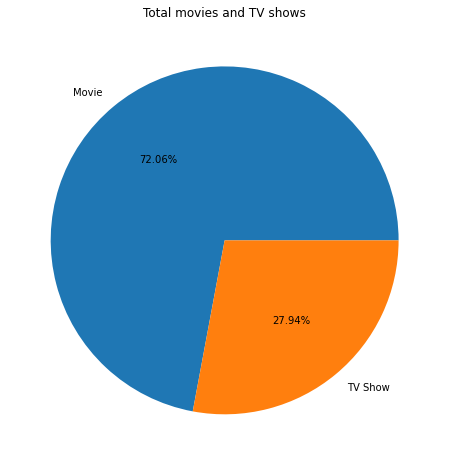

In [253]:
type = df.type.value_counts()
plt.figure(figsize= (10,8))
plt.pie(type, labels =type.index, autopct='%1.2f%%')
plt.title('Total movies and TV shows')
plt.show()

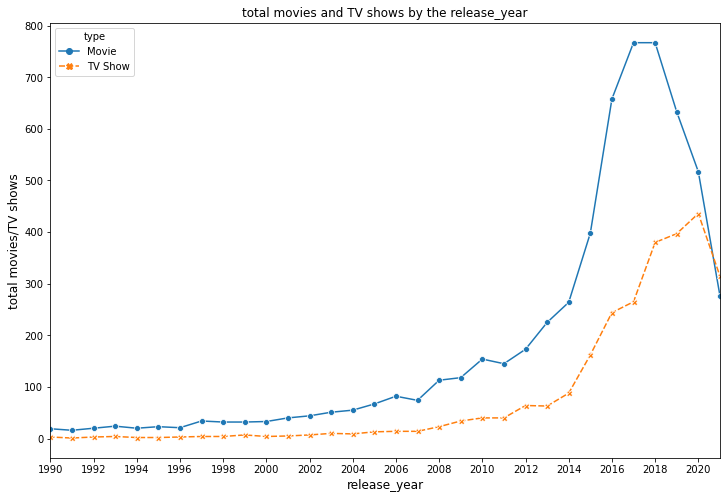

In [254]:
date_added = data.groupby(['type','release_year'])['show_id'].count().reset_index()
plt.figure(figsize = (12, 8))
sns.lineplot(data = date_added, x = 'release_year',y = 'show_id', hue = 'type', style="type",  markers = True)
plt.xlabel('release_year' , fontsize = 12)
plt.ylabel('total movies/TV shows' , fontsize = 12)
plt.title('total movies and TV shows by the release_year' , fontsize = 12)
plt.xlim( left = 2000 , right = 2021)
plt.xticks(np.arange(1990 , 2021 , 2))
plt.show()

######  2018 marks the highest number of movie and TV show releases.
######   Since 2018, A drop in movies is seen and rise in TV shows is observed clearly, and TV shows surpasses the movies count in mid 2020.
###### In recent years TV shows are focussed more than Movies.
######     The yearly number of releases has surged drastically from 2015.


In [255]:
date_added.min(), date_added.max()

(type            Movie
 release_year     1925
 show_id             1
 dtype: object,
 type            TV Show
 release_year       2021
 show_id             767
 dtype: object)

In [256]:
top_10_country = country.country.value_counts().head(10).index
df_new = country.loc[country.country.isin(top_10_country)]
df_new

,show_id,type,country
0,s1,Movie,United States
2,s5,TV Show,India
3,s8,Movie,United States
6,s8,Movie,United Kingdom
7,s8,Movie,Germany
...,...,...,...
10011,s8800,Movie,India
10015,s8803,Movie,United States
10016,s8805,Movie,United States
10017,s8806,Movie,United States


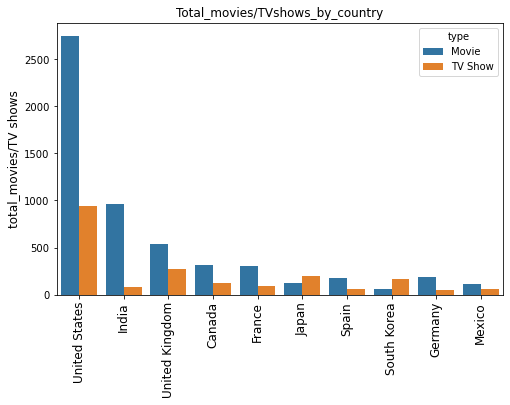

In [257]:
plt.figure(figsize= (8,5))
sns.countplot(data = df_new , x = 'country' , order = top_10_country , hue = 'type')
plt.xticks(rotation = 90 , fontsize = 12)
plt.ylabel('total_movies/TV shows' , fontsize = 12)
plt.xlabel('')
plt.title('Total_movies/TVshows_by_country')
plt.show()

#### United States has most movies and TV Shows available on Netflix. 
#### India is second highest to have more movies on netflix but very less TV shows on netflix.
#### After Unitedd States, Unitedd Kingdom has more TV shows  on Netflix

In [258]:
top_10_country = country.country.value_counts().head(10).index
country['content'] = country['country'].apply(lambda x : x if x in top_10_country else 'Other Countries' )

x_ = country.content.value_counts()
x_

United States      3690
Other Countries    2463
India              1046
United Kingdom      806
Canada              445
France              393
Japan               318
Spain               232
South Korea         231
Germany             226
Mexico              169
Name: content, dtype: int64

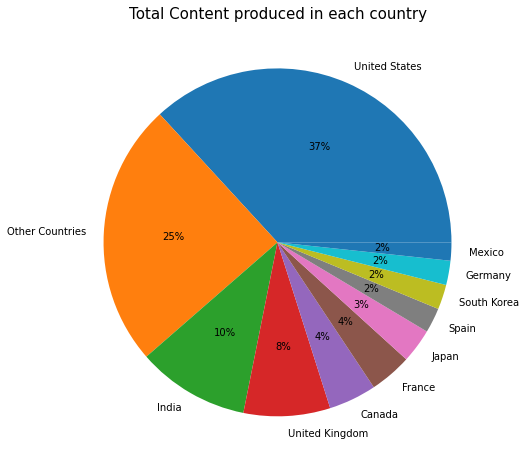

In [259]:
plt.figure(figsize = (8,8))
plt.pie(x_ , labels = x_.index, autopct='%1.0f%%')
plt.title('Total Content produced in each country' , fontsize = 15)
plt.show()

#### 37 % of the content on netflix is produced by United States. followed by other countries and India.
#### Mexico, Germany, South Korea & Spain has very less content on netflix

In [260]:
top_10_country

Index(['United States', 'India', 'United Kingdom', 'Canada', 'France', 'Japan',
       'Spain', 'South Korea', 'Germany', 'Mexico'],
      dtype='object')

In [261]:
top_10_director = director.director.value_counts().head(10).index
df_new_1 = director.loc[director.director.isin(top_10_director)]
df_new_1

,show_id,type,director
41,s42,Movie,Steven Spielberg
329,s330,Movie,Steven Spielberg
406,s407,Movie,Rajiv Chilaka
407,s408,Movie,Rajiv Chilaka
408,s409,Movie,Rajiv Chilaka
...,...,...,...
8184,s8185,Movie,Steven Spielberg
8272,s8273,Movie,Martin Scorsese
8696,s8697,Movie,Steven Spielberg
8735,s8736,Movie,Martin Scorsese


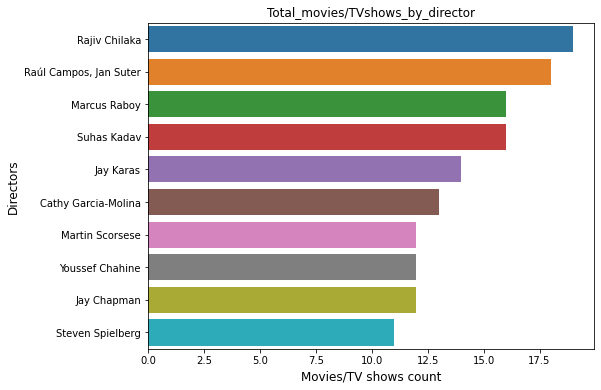

In [262]:
plt.figure(figsize= (8 , 6))
sns.countplot(data = df_new_1 , y = 'director' , order = top_10_director , orient = 'v')
plt.xlabel('total_movies/TV shows' , fontsize = 12)
plt.xlabel('Movies/TV shows count')
plt.ylabel('Directors' , fontsize = 12)
plt.title('Total_movies/TVshows_by_director')
plt.show()

#### Rajiv Chilaka is the top director on netflix 

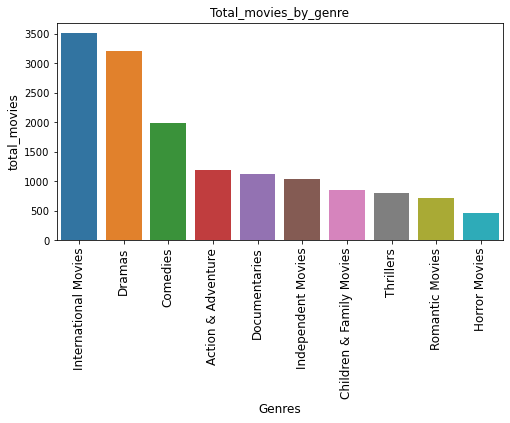

In [263]:
top_10_movie_genre = genr[genr['type'] == 'Movie'].listed_in.value_counts().head(10).index
df_movie = genr.loc[genr['listed_in'].isin(top_10_movie_genre)]

top_10_TV_genre = genr[genr['type'] == 'TV Show'].listed_in.value_counts().head(10).index
df_tv = genr.loc[genr['listed_in'].isin(top_10_TV_genre)]

plt.figure(figsize= (8,4))
sns.countplot(data = df_movie , x = 'listed_in' , order = top_10_movie_genre)
plt.xticks(rotation = 90 , fontsize = 12)
plt.ylabel('total_movies' , fontsize = 12)
plt.xlabel('Genres' , fontsize = 12)
plt.title('Total_movies_by_genre')
plt.show()



#### Above are top 10 genres for movies are available on netflix. International movies, Dramas and Comedies on top 3

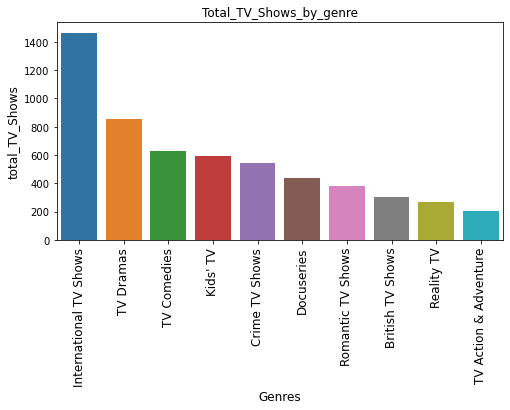

In [264]:
plt.figure(figsize= (8,4))
sns.countplot(data = df_tv , x = 'listed_in' , order = top_10_TV_genre)
plt.xticks(rotation = 90 , fontsize = 12)
plt.ylabel('total_TV_Shows' , fontsize = 12)
plt.xlabel('Genres' , fontsize = 12)
plt.title('Total_TV_Shows_by_genre')
plt.show()

#### Above are the top 10 genre for TV Shows, out of them International TV Shows watched the most, followed by TV Dramas

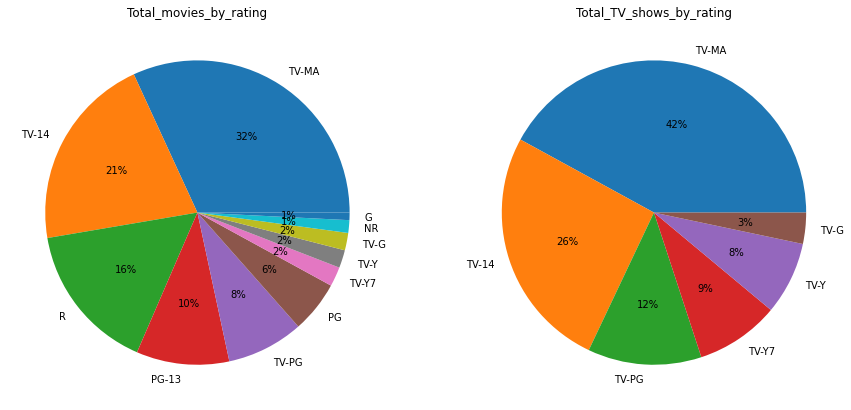

In [265]:
rating_movie = movies.loc[~movies.rating.isin(['Not available' , 'NC-17' , 'TV-Y7-FV', '74 min', '84 min', '66 min', 'UR'])]
rating_movie = rating_movie.rating.value_counts()
rating_tv = tv_show.loc[~tv_show.rating.isin(['Not available' , 'R' , 'NR', 'TV-Y7-FV'])]
rating_tv = rating_tv.rating.value_counts()


fig, ax = plt.subplots(1,2, figsize=(15,15))
ax[0].pie(rating_movie , labels = rating_movie.index, autopct='%1.0f%%')
ax[0].set_title('Total_movies_by_rating')

ax[1].pie(rating_tv , labels = rating_tv.index, autopct='%1.0f%%')
ax[1].set_title('Total_TV_shows_by_rating')

plt.show()

#### Most of the movies got rated TV-MA, followed by TV-14. Very less movies got rated G, NR , TV-G, TV-Y & TV-Y7
#### 42% of the TV Shows got rated TV-MA, 26% got rated TV-14. and almost 3% of the TV Shows got rated TV-G

In [266]:
movies_1 = movies[movies['duration'] != 'Not available']

# Convert 'duration' column to string
movies_1['duration'] = movies_1['duration'].astype(str)

# Remove ' min' and convert to float
movies_1['duration'] = movies_1['duration'].str.replace(' min', '').astype(float)


In [267]:
tv_show['duration'] = tv_show.duration.str[:-7].apply(lambda x : x.strip())
tv_show['duration'] = tv_show['duration'].astype('float')

In [268]:
movies_1.duration.min(), movies_1.duration.max()

(3.0, 312.0)

In [269]:
tv_show['duration'].min(), tv_show['duration'].max()

(1.0, 17.0)

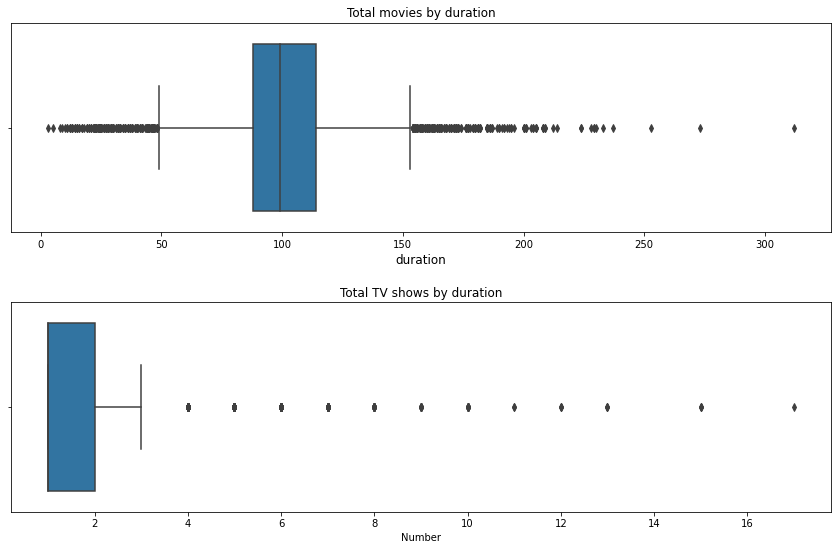

In [270]:
fig, ax = plt.subplots(2, 1, figsize=(12,8))

sns.boxplot (data = movies_1 , x = 'duration' ,ax =ax[0])
ax[0].set_xlabel('duration' ,  fontsize = 12)
ax[0].set_title('Total movies by duration')

sns.boxplot (data = tv_show , x = 'duration' , ax = ax[1])
ax[1].set_xlabel('Number' ,  fontsize = 10)
ax[1].set_title('Total TV shows by duration')
plt.tight_layout(pad=2.0)
plt.show()



##### The minimum duration for a movie is 3 minutes, and the maximum is 312 minutes. The median duration for movies is around 100 minutes.

##### For TV shows, the minimum duration is 1 season, and the maximum is 17 seasons. However, the majority of TV shows have a duration of around 3 seasons.

In [271]:
data['week'] = data['date_added'].dt.time

# groupby week and count
release_count = data.groupby(['type', 'week']).size().unstack(fill_value=0)
release_count

week,00:00:00
type,
Movie,6131
TV Show,2666


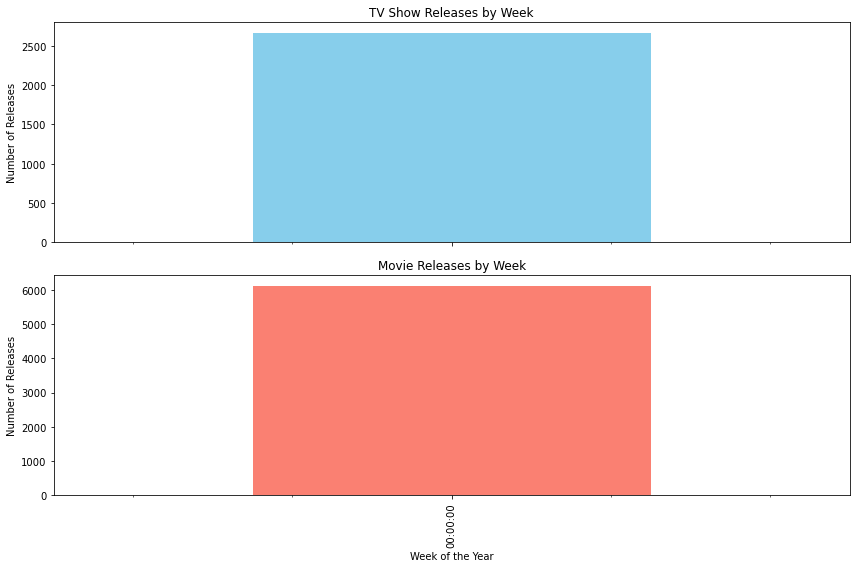

In [272]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8), sharex=True)

release_count.loc['TV Show'].plot(kind='bar', ax=axes[0], color='skyblue', label='TV Show Releases')
release_count.loc['Movie'].plot(kind='bar', ax=axes[1], color='salmon', label='Movie Releases')

axes[0].set_title('TV Show Releases by Week')
axes[1].set_title('Movie Releases by Week')
axes[1].set_xlabel('Week of the Year')
axes[0].set_ylabel('Number of Releases')
axes[1].set_ylabel('Number of Releases')

plt.tight_layout()
plt.show()

In [273]:
# Extract week number
data['Week'] = data['date_added'].dt.isocalendar().week

# Group by type and week, count releases
release_count = data.groupby(['type', 'Week']).size().unstack(fill_value=0)

# Find the week with the highest number of releases for TV shows and movies
best_week_tv_show = release_count.loc['TV Show'].idxmax()
best_week_movie = release_count.loc['Movie'].idxmax()

print("Best week to release a TV show:", best_week_tv_show)
print("Best week to release a movie:", best_week_movie)

Best week to release a TV show: 27
Best week to release a movie: 1


In [274]:
# Extract month from release date
data['month'] = pd.to_datetime(data['date_added']).dt.month_name()

# Analyze by type (TV Show vs. Movie)
def analyze_by_type(data, type_name):
            type_data = data[data["type"] == type_name]
            month_counts = type_data["month"].value_counts().sort_values(ascending=False)
            print(f"\n** {type_name} Release Months (Most Frequent - Least Frequent):")
            for month, count in month_counts.items():
                print(f"{month}: {count}")

tv_show_per_month = analyze_by_type(data.copy(), "TV Show")
movies_per_month = analyze_by_type(data.copy(), "Movie")


** TV Show Release Months (Most Frequent - Least Frequent):
December: 266
July: 262
September: 251
August: 236
June: 236
October: 215
April: 214
March: 213
November: 207
May: 193
January: 192
February: 181

** Movie Release Months (Most Frequent - Least Frequent):
July: 565
April: 550
December: 547
January: 546
October: 545
March: 529
September: 519
August: 519
November: 498
June: 492
May: 439
February: 382


<Figure size 720x2160 with 0 Axes>

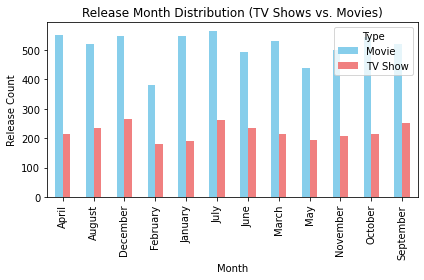

In [275]:
# Group data by month and type, calculate counts
month_release_counts = data.groupby(['month', 'type'])['type'].count().unstack()

# Create a bar chart
plt.figure(figsize = (10, 30))
month_release_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.xlabel("Month")
plt.ylabel("Release Count")
plt.title("Release Month Distribution (TV Shows vs. Movies)")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend(title="Type")
plt.tight_layout()
plt.show()

#### Most of the movies got released in July and TV Shows in December

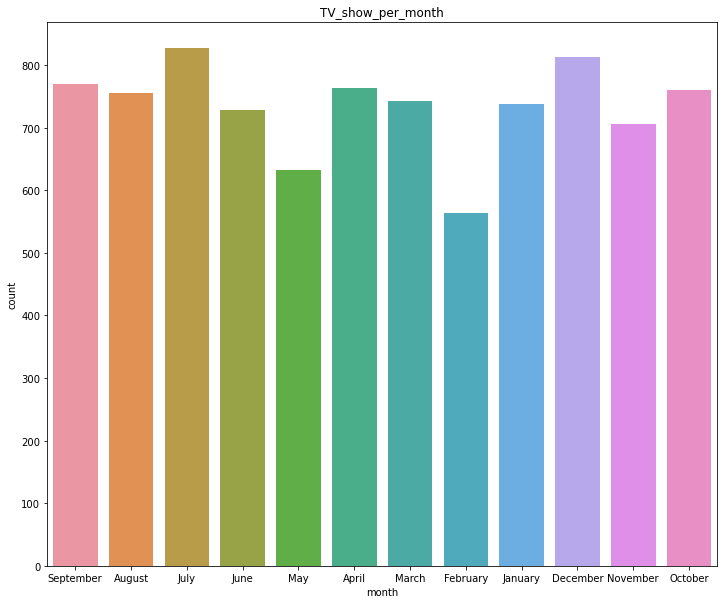

In [276]:
plt.figure(figsize = (12, 10))
sns.countplot(data= data, x= data.month,  y= tv_show_per_month, orient = 'h')
plt.title('TV_show_per_month')
plt.show()

#### It seems July & December is the most popular period to release a TV Shows

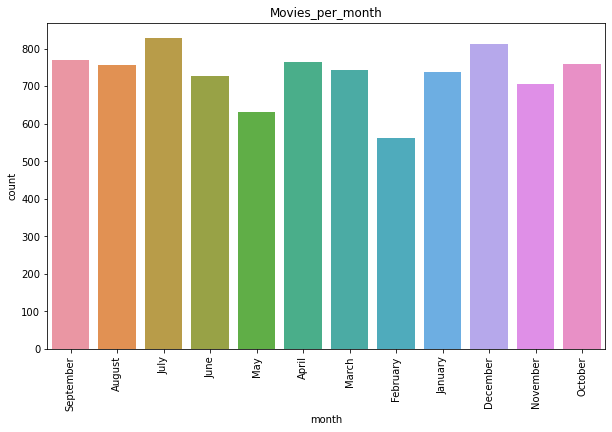

In [277]:
plt.figure(figsize = (10, 6))
sns.countplot(data= data, x= data.month,  y= movies_per_month, orient = 'h')
plt.title('Movies_per_month')
plt.xticks(rotation = 90)
plt.show()

#### It seems most of the movies got released on netflix in July & December 

### Wordcloud of most common genre

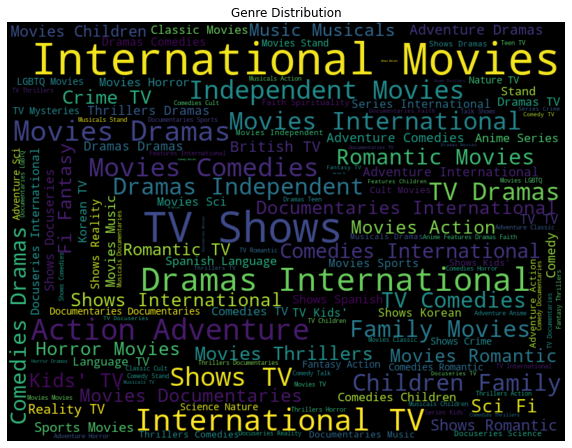

In [278]:
# Assuming your data is in a DataFrame named 'df'
all_genres = " ".join(genr["listed_in"].tolist())  # Assuming 'listed_in' is the genre column

# Create WordCloud object
import wordcloud
wordcloud = wordcloud.WordCloud(width=800, height=600).generate(all_genres)

# Display the WordCloud
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Genre Distribution")
plt.show()

#### International Movies is the most popular genre on netflix followed by Dramas, Action, Adventure, Comedy

In [279]:
# data['added_year'] =  pd.to_datetime(data['date_added']).dt.year
# data

### Difference of date added on netflix after it got released.

In [280]:
from collections import Counter

# Calculate the difference in days between the release year and the date added to Netflix
movie_filtered['Difference_In_Days'] = (movie_filtered['date_added'] - movie_filtered['release_year']).dt.days

# Find the mode (most common) difference in days
mode_difference = Counter(movie_filtered['Difference_In_Days']).most_common(1)[0][0]

print("Mode difference in days:", mode_difference)

Mode difference in days: 334


In [281]:
movie_filtered[movie_filtered.Difference_In_Days == movie_filtered.Difference_In_Days.min()]

,show_id,type,title,director,cast,date_added,release_year,rating,duration,listed_in,description,country,date_added_netflix,Difference_In_Days
1783,s1467,Movie,The Minimalists: Less Is Now,Unknown director,Unknown cast,2021-01-01,2021-01-01,TV-14,54 min,Documentaries,They've built a movement out of minimalism. Lo...,United States,2021,0
1788,s1469,Movie,What Happened to Mr. Cha?,Kim Dong-kyu,"Cha In-pyo, Cho Dal-hwan, Song Jae-ryong",2021-01-01,2021-01-01,TV-MA,102 min,"Comedies, International Movies","With the peak of his career long behind him, a...",South Korea,2021,0
3709,s3061,Movie,Ghost Stories,"Anurag Kashyap, Dibakar Banerjee, Karan Johar,...","Janhvi Kapoor, Sobhita Dhulipala, Sukant Goel,...",2020-01-01,2020-01-01,TV-MA,145 min,"Horror Movies, International Movies, Thrillers","The directors of Emmy-nominated ""Lust Stories""...",India,2020,0


In [282]:
movie_filtered[movie_filtered.Difference_In_Days == movie_filtered.Difference_In_Days.max()]

,show_id,type,title,director,cast,date_added,release_year,rating,duration,listed_in,description,country,date_added_netflix,Difference_In_Days
9474,s7791,Movie,Prelude to War,Frank Capra,Unknown cast,2017-03-31,1942-01-01,TV-14,52 min,"Classic Movies, Documentaries",Frank Capra's documentary chronicles the rise ...,United States,2017,27483
10022,s8206,Movie,The Battle of Midway,John Ford,"Henry Fonda, Jane Darwell",2017-03-31,1942-01-01,TV-14,18 min,"Classic Movies, Documentaries",Director John Ford captures combat footage of ...,United States,2017,27483


In [283]:
movie_filtered.Difference_In_Days.min(), movie_filtered.Difference_In_Days.max()

(0, 27483)

#### It appears that there are two movies on Netflix that were added 75 years after their release dates. Additionally, there are three movies on Netflix that were added immediately after their release.

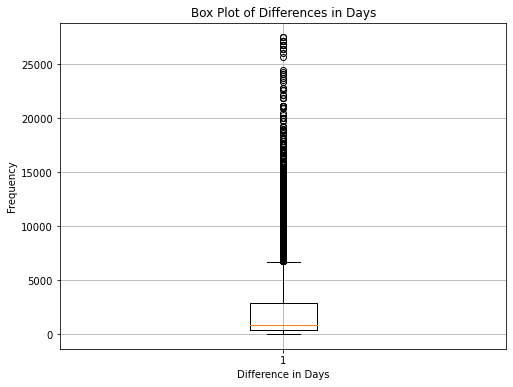

In [284]:
plt.figure(figsize=(8, 6))
plt.boxplot(movie_filtered['Difference_In_Days'])
plt.title('Box Plot of Differences in Days')
plt.xlabel('Difference in Days')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

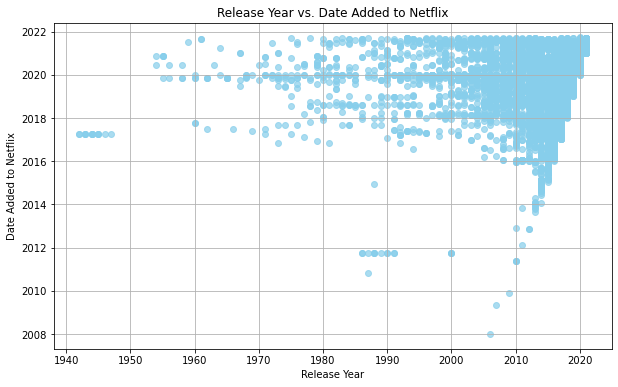

In [285]:
# Plot a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(movie_filtered['release_year'], movie_filtered['date_added'], color='skyblue', alpha=0.7)
plt.title('Release Year vs. Date Added to Netflix')
plt.xlabel('Release Year')
plt.ylabel('Date Added to Netflix')
plt.grid(True)
plt.show()

##### Based on the graph above, it appears that the majority of movies on Netflix were added after 2010 and up to 2022. However, there are exceptions, such as movies released around 1945 that were added to Netflix in 2017.

# Insights about Data

##### Approximately 70% of Netflix's content consists of movies, with the remaining 30% comprising TV shows.

##### The uploading of movies and TV shows on Netflix began in 2008, with relatively little content until 2014. However, there was a significant increase in content starting in 2015, reaching its peak in 2019. The years 2020 and 2021 saw a decline in content, likely due to the pandemic, although the drop was less pronounced for TV shows compared to movies.

##### Since 2018, there has been a decline in the number of movies uploaded, while the number of TV shows has continued to rise steadily. By mid-2020, TV shows surpassed movies in quantity, reflecting their growing popularity in recent years.

##### Netflix features movies from a variety of directors, with approximately 4529 directors contributing to the platform. Additionally, movies from a total of 123 countries are available on Netflix, with the United States being the highest contributor, accounting for almost 37% of all content.

###### The release years for shows on Netflix are concentrated in the range of 2005 to 2021. Movie durations typically range from 50 to 150 minutes, while TV shows typically span 1 to 3 seasons.

##### Content availability varies across different ratings, with certain ratings like TV-Y7, TV-Y7 FV, PG, TV-G, G, TV-Y, and TV-PG being less common outside the United States.

##### The top three genres on Netflix for both movies and TV shows are international movies and TV shows, dramas, and comedies. While most countries have country-specific popular genres, the United States features a diverse mix of genres.

##### Shorter-duration movies have been particularly popular over the last 10 years.

# business insights

##### Netflix has the majority of its content released after the year 2000, with scarce offerings from before that time. This older content could potentially cater to senior citizens, currently underrepresented on the platform.

##### Over 80% of Netflix's content is rated TV-MA or TV-14, targeting mature and adult audiences, while the remaining 20% is suitable for children under 13, with parental guidance. This indicates a focus on mature viewers or children with supervision.

##### The most popular genres on Netflix include international movies and TV shows, dramas, comedies, action & adventure, children & family movies, and thrillers.

##### Approximately 75% of Netflix's content originates from the top 10 countries, while the rest of the world contributes only 25%. Future business growth could involve expanding content offerings from more countries.

##### There is a growing preference for shorter-duration content, such as movies lasting 75 to 150 minutes and TV show seasons spanning 1 to 3. This trend could influence future content production on Netflix.

##### A decline in content is observed across all countries and content types in 2020 and 2021, possibly due to the pandemic.
